In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
graf = gpd.read_file(r"C:\Users\btok\DataspellProjects\AdvancedGIS\data1\PoliceData.gdb", driver='fileGDB', layer="GraffitiIncidents")
pz = gpd.read_file(r"C:\Users\btok\DataspellProjects\AdvancedGIS\data1\PoliceData.gdb", driver='fileGDB', layer="PatrolZones")

In [2]:
# join point to polygon, group by name and count and assign these values to patrol zone INCIDENTS column
pz["INCIDENTS"] = gpd.sjoin(graf, pz, how="inner", predicate="within").groupby(["NAME"]).size().reset_index(name="incidentsPerZone")["incidentsPerZone"]
pz


,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry
0,6,None,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,10,None,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,20,None,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,21,None,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,10,None,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."
5,13,None,South Central,9527,11373.304385,7.716063e+06,"MULTIPOLYGON (((691030.488 5162897.270, 691039..."
6,23,None,Central,7902,9539.703811,3.663411e+06,"MULTIPOLYGON (((690779.654 5163584.137, 691030..."
7,21,None,Southwest,10224,11495.243750,6.681488e+06,"MULTIPOLYGON (((688374.476 5162840.310, 688410..."
8,12,None,Northwest,12118,15289.916918,1.102094e+07,"MULTIPOLYGON (((688889.416 5166528.990, 688977..."


In [3]:
# calculate and assign priority to each zone
incRate = pz["INCIDENTS"] / (pz["SHAPE_Area"] / 2589988.11)
pz.loc[incRate > 15, "PRIORITY"] = "TOP CONCERN"    
pz.loc[(incRate < 15) & (incRate >= 12), "PRIORITY"] = "HIGH CONCERN"    
pz.loc[(incRate < 12) & (incRate >= 6), "PRIORITY"] = "MEDIUM CONCERN"    
pz.loc[incRate < 6, "PRIORITY"] = "LOW CONCERN"
pz

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry
0,6,LOW CONCERN,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,10,MEDIUM CONCERN,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,20,TOP CONCERN,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,21,HIGH CONCERN,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,10,LOW CONCERN,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."
5,13,LOW CONCERN,South Central,9527,11373.304385,7.716063e+06,"MULTIPOLYGON (((691030.488 5162897.270, 691039..."
6,23,TOP CONCERN,Central,7902,9539.703811,3.663411e+06,"MULTIPOLYGON (((690779.654 5163584.137, 691030..."
7,21,MEDIUM CONCERN,Southwest,10224,11495.243750,6.681488e+06,"MULTIPOLYGON (((688374.476 5162840.310, 688410..."
8,12,LOW CONCERN,Northwest,12118,15289.916918,1.102094e+07,"MULTIPOLYGON (((688889.416 5166528.990, 688977..."


In [4]:
pz["center"] = pz["geometry"].centroid
pz_points = pz.copy()
pz_points.set_geometry("center", inplace=True)

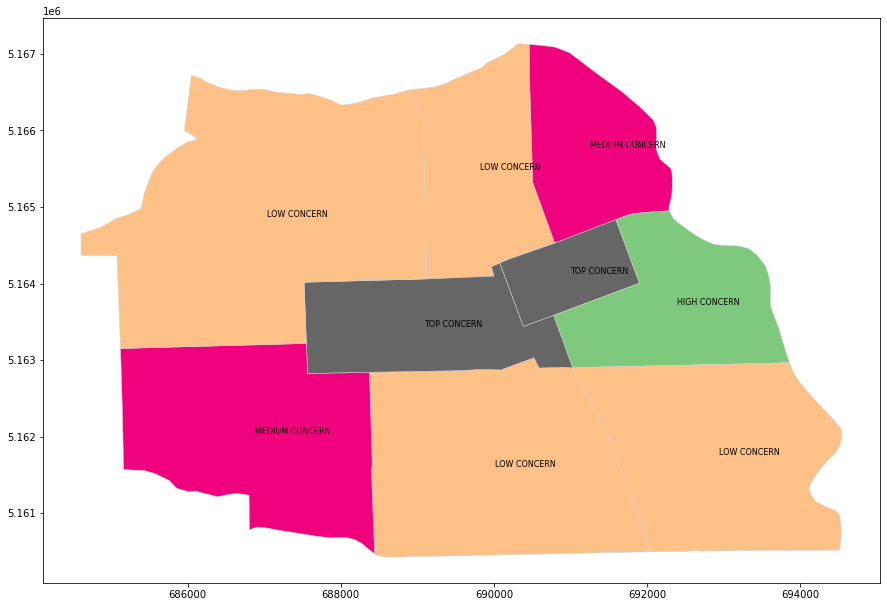

In [5]:
ax = pz.plot(column="PRIORITY", figsize = (15, 12), cmap="Accent", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(pz_points.geometry.x, pz_points.geometry.y, pz_points["PRIORITY"]):
    texts.append(plt.text(x, y, label, fontsize = 8))